<a href="https://colab.research.google.com/github/1da1ana1/Case_Itau/blob/main/CaseItau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Importando bibliotecas
Primeiro, é importante importar todas as bibliotecas que serão usadas para análise, além do banco de dados.


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_excel('/content/drive/MyDrive/caseItau/DadosTextil.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#2. Entendendo os tipos de dados e o que contêm no banco de dados

In [ ]:
#Esse comando permite com que eu visualize as primeiras linhas com dados e o título das colunas do banco de dados
df.head()

,Mercado,Nome Cliente,Cidade,Num Entregas,Peso equivalente,Linhas Pedido,Numero Notas Fiscais,Volumes,Faturamento Anual,Custo Produto,Custos Fixos,Custos Operacionais Relativos,Frete,$ Entregas,$ Frete Peso,Lucro,Lucratividade,Unnamed: 17,Unnamed: 18
0,Têxtil,Customer 1,DIADEMA,2,609.5675,4,2,24,17434.020,9414.3708,1516.759740,4171.4020,122.5,16.6,105.9,2208.987460,0.126706,NaN,NaN
1,Têxtil,Customer 2,EMBU-GUACU,4,1119.8125,8,4,44,5939.875,3207.5325,516.769125,3203.9875,150.0,33.2,116.8,-1138.414125,-0.191656,NaN,"Custo Nota fiscal = R$ 2,50"
2,Têxtil,Customer 3,DIADEMA,28,1045.8075,56,28,66,63449.550,34262.7570,5520.110850,11446.9550,885.0,232.4,652.6,11334.727150,0.178642,NaN,"Custo Cobrança bancária = R$ 1,00"
3,Têxtil,Customer 4,SAO PAULO,26,2471.3775,80,26,68,39779.635,21481.0029,3460.828245,8679.9635,570.0,215.8,354.2,5587.840355,0.140470,NaN,"Custo de uma entrega = R$ 8,30"
4,Têxtil,Customer 5,SAO CAETANO SUL,8,9536.9075,28,14,2832,64972.495,35085.1473,5652.607065,10423.2495,990.0,66.4,923.6,12821.491140,0.197337,NaN,NaN


In [ ]:
#Com esse comando eu consigo ver uma descrição geral dos dados da planilha.
round(df.describe(),2)

,Num Entregas,Peso equivalente,Linhas Pedido,Numero Notas Fiscais,Volumes,Faturamento Anual,Custo Produto,Custos Fixos,Custos Operacionais Relativos,Frete,$ Entregas,$ Frete Peso,Lucro,Lucratividade,Unnamed: 17
count,145.00,145.00,145.00,145.00,145.00,145.00,145.00,145.00,145.00,145.00,145.00,145.00,145.00,145.00,0.0
mean,22.11,5323.75,118.84,27.06,531.03,88731.97,47915.26,7719.68,13555.49,840.62,183.52,657.10,18700.92,-0.29,NaN
std,34.86,19736.02,626.56,66.67,2370.95,233086.90,125866.93,20278.56,26833.04,2332.69,289.37,2114.96,58847.07,0.75,NaN
min,2.00,9.74,4.00,2.00,2.00,640.73,345.99,55.74,2432.07,0.00,16.60,-149.40,-2650.90,-3.50,NaN
25%,4.00,186.96,8.00,4.00,14.00,4426.67,2390.40,385.12,3088.67,80.00,33.20,45.90,-1664.65,-0.40,NaN
50%,10.00,792.63,24.00,12.00,42.00,16057.14,8670.85,1396.97,5214.74,295.00,83.00,189.50,385.58,0.03,NaN
75%,26.00,3754.78,56.00,28.00,204.00,57988.76,31313.93,5045.02,10353.91,842.50,215.80,597.20,8136.36,0.15,NaN
max,270.00,216838.54,7312.00,716.00,20404.00,1607974.80,868306.39,139893.81,197919.48,23982.50,2241.00,22588.10,377872.62,0.27,NaN


In [ ]:
#Com esse comando vejo as informações do tipo de dado que contido em cada coluna do banco de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Mercado                        145 non-null    object 
 1   Nome Cliente                   145 non-null    object 
 2   Cidade                         145 non-null    object 
 3   Num Entregas                   145 non-null    int64  
 4   Peso equivalente               145 non-null    float64
 5   Linhas Pedido                  145 non-null    int64  
 6   Numero Notas Fiscais           145 non-null    int64  
 7   Volumes                        145 non-null    int64  
 8   Faturamento Anual              145 non-null    float64
 9   Custo Produto                  145 non-null    float64
 10  Custos Fixos                   145 non-null    float64
 11  Custos Operacionais Relativos  145 non-null    float64
 12  Frete                          145 non-null    flo

#3. Seção de tratamento de dados

In [ ]:
#Com esse comando consigo ver a nomenclatura(index) das colunas
#É importante pois os nomes serão usados para realizar a manipulação dos dados
df.columns

Index(['Mercado', 'Nome Cliente', 'Cidade', 'Num Entregas', 'Peso equivalente',
       'Linhas Pedido', 'Numero Notas Fiscais', 'Volumes', 'Faturamento Anual',
       'Custo Produto', 'Custos Fixos', 'Custos Operacionais Relativos',
       'Frete', '$ Entregas', '$   Frete Peso', 'Lucro', 'Lucratividade',
       'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')

In [ ]:
#Excluo as colunas que não são pertinentes
df = df.drop(columns=['Unnamed: 17', 'Unnamed: 18'], axis=1)

In [ ]:
#Renomeio as colunas para evitar erros de digitação e deixar mais claro do que se trata
df = df.rename(columns={
    "Peso equivalente": "Peso equivalente kg",
    "$ Entregas": "Entregas r$",
    "$   Frete Peso": "Frete r$",
    "Lucratividade": "Lucratividade percentual",
    "Numero Notas Fiscais": "Num Notas Fiscais",
    "Faturamento Anual": "Faturamento Anual por cli"
})

In [ ]:
#Aqui eu tiro os espaços dos títulos das colunas, coloco em minúsculas e os espaços são preenchidos com _
#Como dito anteriormente, é importante por que os nomes serão chamados para realizar operações
#E na linguagem Python no contexto de análise de dados é importante manter padronização
df.columns=(
    df.columns.str.strip()              # remove espaços
              .str.lower()              # poe em minúsculo
              .str.replace(" ", "_")    # espaços viram underscores
)

In [ ]:
#visualizando as colunas atualizadas, com a exclusão das selecionadas e as renomeadas, para melhor entendimento dos dados
df.columns

Index(['mercado', 'nome_cliente', 'cidade', 'num_entregas',
       'peso_equivalente_kg', 'linhas_pedido', 'num_notas_fiscais', 'volumes',
       'faturamento_anual_por_cli', 'custo_produto', 'custos_fixos',
       'custos_operacionais_relativos', 'frete', 'entregas_r$', 'frete_r$',
       'lucro', 'lucratividade_percentual'],
      dtype='object')

In [ ]:
#verificando se existe algum valor nulo no banco de dados
df.isnull().sum()

,0
mercado,0
nome_cliente,0
cidade,0
num_entregas,0
peso_equivalente_kg,0
linhas_pedido,0
num_notas_fiscais,0
volumes,0
faturamento_anual_por_cli,0
custo_produto,0


#4. Seção de Análise de Receita e Vendas

In [ ]:
df.columns

Index(['mercado', 'nome_cliente', 'cidade', 'num_entregas',
       'peso_equivalente_kg', 'linhas_pedido', 'num_notas_fiscais', 'volumes',
       'faturamento_anual_por_cli', 'custo_produto', 'custos_fixos',
       'custos_operacionais_relativos', 'frete', 'entregas_r$', 'frete_r$',
       'lucro', 'lucratividade_percentual'],
      dtype='object')

In [ ]:
#Aqui eu analiso a média de cada coluna do banco de dados
df_media = round(df.mean(numeric_only=True),1)
print(df_media)

num_entregas                        22.1
peso_equivalente_kg               5323.8
linhas_pedido                      118.8
num_notas_fiscais                   27.1
volumes                            531.0
faturamento_anual_por_cli        88732.0
custo_produto                    47915.3
custos_fixos                      7719.7
custos_operacionais_relativos    13555.5
frete                              840.6
entregas_r$                        183.5
frete_r$                           657.1
lucro                            18700.9
lucratividade_percentual            -0.3
dtype: float64


<Axes: >

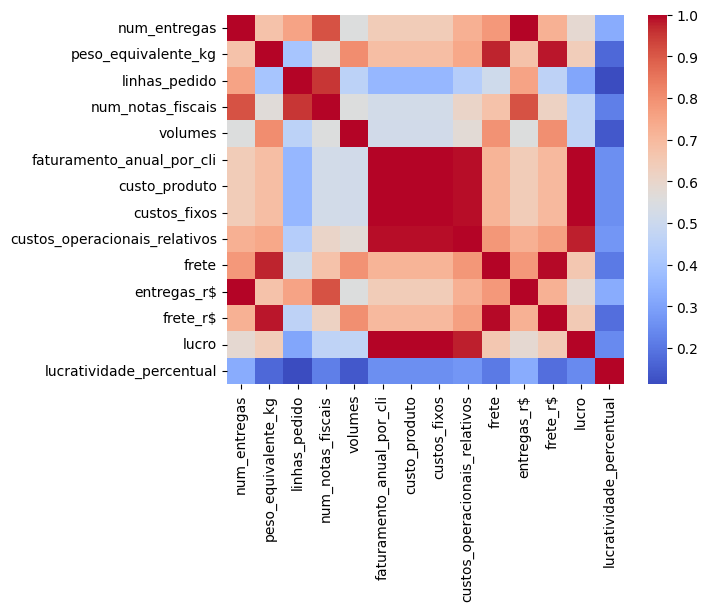

In [ ]:
df_num = df.drop(columns=['mercado', 'nome_cliente', 'cidade'])
corr = df_num.corr()
sns.heatmap(corr, cmap='coolwarm')
#vemos um foco no meio em que o faturamento anual está fortemente relacionado lucro, custos fixos, custos relativos, custos operacionais
#peso tem relação com frete peso

In [ ]:
#faturamento anual
df_fat_anual_total = df['faturamento_anual_por_cli'].sum()
df_fat_anual_total_f = f"{df_fat_anual_total:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
print("O faturamento anual da empresa é:", f"R$ {df_fat_anual_total_f}")

O faturamento anual da empresa é: R$ 12.866.135,16


In [ ]:
#lucro total
df_lucro = df['lucro'].sum()
df_lucro_f = f"{df_lucro:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
print("O lucro total da empresa no mês passado foi de:", f"R$ {df_lucro_f}")

O lucro total da empresa no mês passado foi de: R$ 2.711.632,90


In [ ]:
#pedidos no mês
pedidos_totais = df['linhas_pedido'].sum()
print("A quantidade de pedidos por mês é a seguinte:", pedidos_totais)

A quantidade de pedidos por mês é a seguinte: 17232


#5. Seção de Análise de de Clientes

In [ ]:
#Contagem da quantidade de clientes
qtd_clientes = df['nome_cliente'].count()
print(f"há {qtd_clientes} clientes na base de dados")

há 145 clientes na base de dados


Text(0, 0.5, 'Cliente')

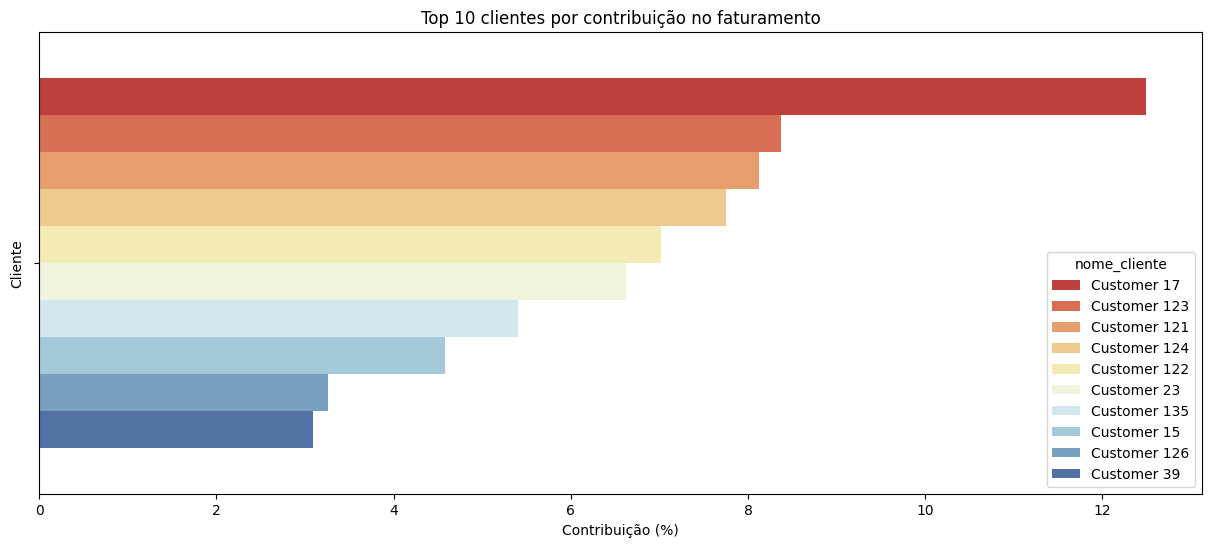

In [ ]:
# Cálculo da contribuição
df['contribuicao_clientes'] = df['faturamento_anual_por_cli'] * 100 / df_fat_anual_total

# Top 10 clientes com maior contribuição
top_clientes = df.nlargest(10, 'contribuicao_clientes')

plt.figure(figsize=(15, 6))
sns.barplot(
    hue ="nome_cliente",
    x="contribuicao_clientes",
    data=top_clientes,
    palette="RdYlBu"
)
plt.title("Top 10 clientes por contribuição no faturamento")
plt.xlabel("Contribuição (%)")
plt.ylabel("Cliente")

In [ ]:
#Porcentagem de clientes com lucratividade negativa
lucratividade_neg = (df['lucratividade_percentual'] < 0).sum()
qtd_clientes = df['nome_cliente'].count()
porcentagem_preju = (lucratividade_neg / qtd_clientes) * 100
print(f"{round(porcentagem_preju,2)} % dos clientes da empresa tiveram lucratividade negativa")

46.21 % dos clientes da empresa tiveram lucratividade negativa


In [ ]:
moda_cidade = clientes_prejuizo['cidade'].mode()
print(moda_cidade)

0    SAO PAULO
Name: cidade, dtype: object


In [ ]:
df.columns

Index(['mercado', 'nome_cliente', 'cidade', 'num_entregas',
       'peso_equivalente_kg', 'linhas_pedido', 'num_notas_fiscais', 'volumes',
       'faturamento_anual_por_cli', 'custo_produto', 'custos_fixos',
       'custos_operacionais_relativos', 'frete', 'entregas_r$', 'frete_r$',
       'lucro', 'lucratividade_percentual', 'contribuicao_clientes'],
      dtype='object')

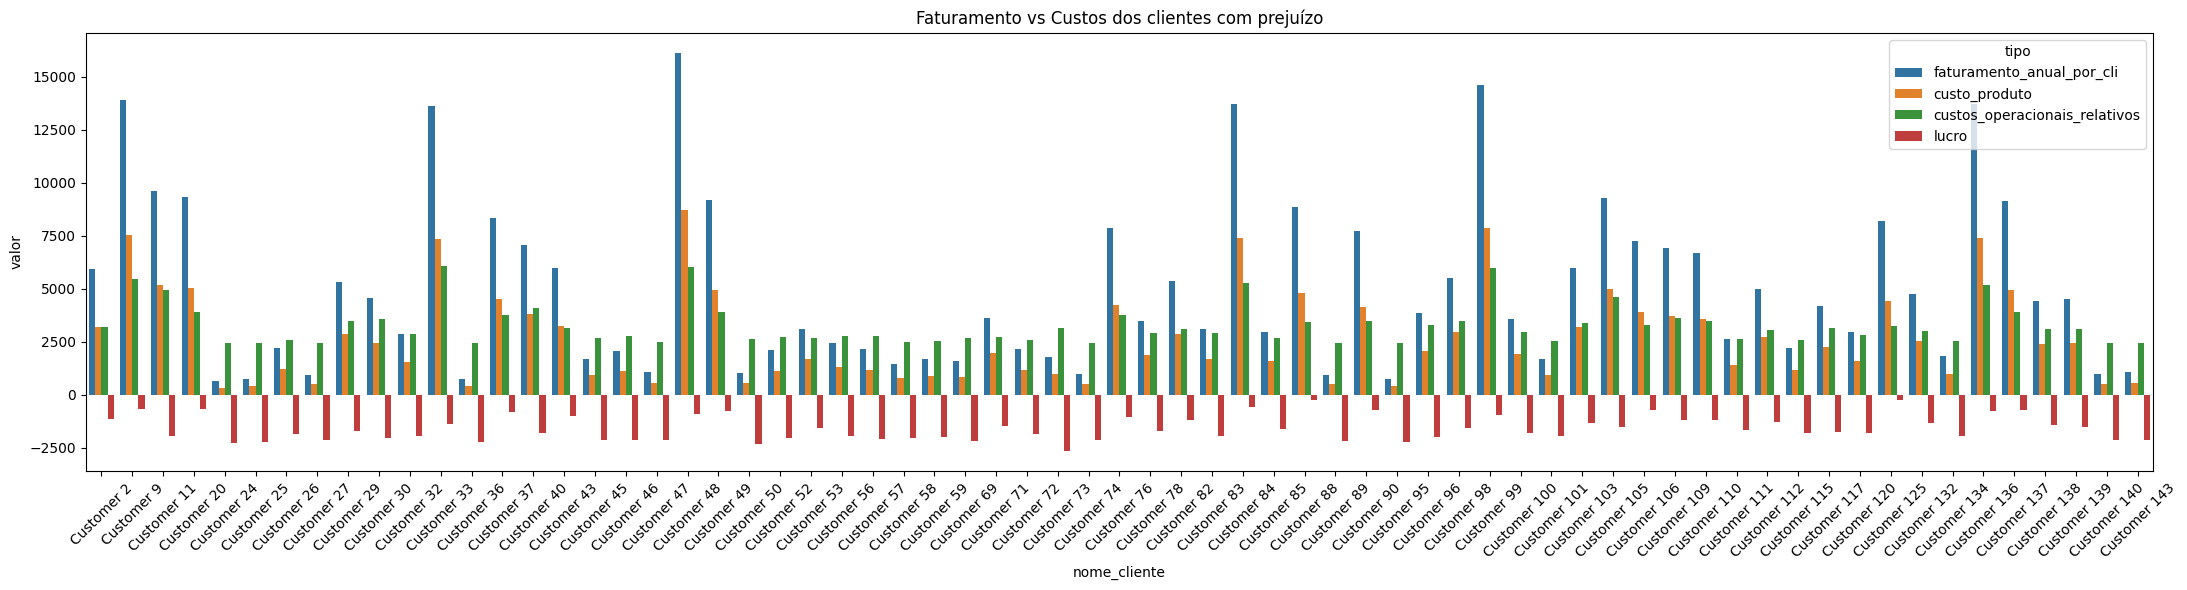

In [ ]:
df_preju = df[df['lucro'] < 0]

df_preju_melt = df_preju.melt(
    id_vars=['nome_cliente'],  value_vars=['faturamento_anual_por_cli', 'custo_produto', 'custos_operacionais_relativos', 'lucro'],
    var_name='tipo',
    value_name='valor'
)

plt.figure(figsize=(22,6))
sns.barplot(data=df_preju_melt, x='nome_cliente', y='valor', hue='tipo')
plt.xticks(rotation=45)
plt.title("Faturamento vs Custos dos clientes com prejuízo")
plt.tight_layout()
plt.show()

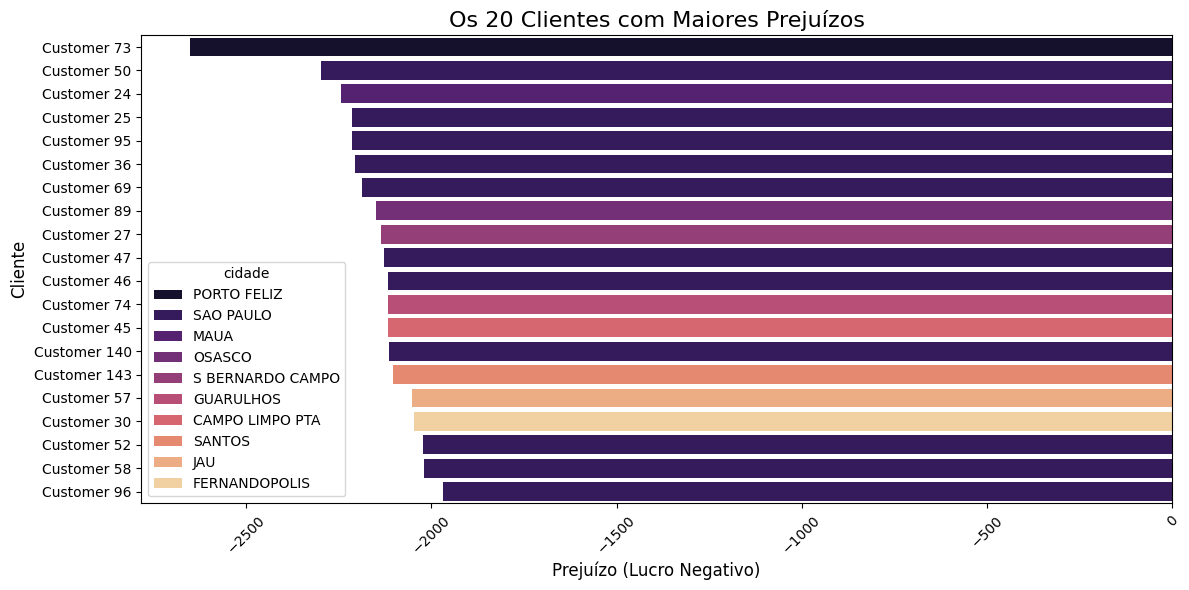

In [ ]:
clientes_prejuizo = df.loc[df['lucro'] < 0, ['nome_cliente', 'cidade', 'lucro']]

# Ordenar pelos maiores prejuízos
clientes_prejuizo = clientes_prejuizo.sort_values(by='lucro').head(20)

# Criar o gráfico os 20 maiores prejuízos
plt.figure(figsize=(12, 6))
sns.barplot(x='lucro', y='nome_cliente', hue='cidade',
            data=clientes_prejuizo, palette='magma')

plt.title('Os 20 Clientes com Maiores Prejuízos', fontsize=16)
plt.xlabel('Prejuízo (Lucro Negativo)', fontsize=12)
plt.ylabel('Cliente', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [ ]:
df.columns

Index(['mercado', 'nome_cliente', 'cidade', 'num_entregas',
       'peso_equivalente_kg', 'linhas_pedido', 'num_notas_fiscais', 'volumes',
       'faturamento_anual_por_cli', 'custo_produto', 'custos_fixos',
       'custos_operacionais_relativos', 'frete', 'entregas_r$', 'frete_r$',
       'lucro', 'lucratividade_percentual', 'contribuicao_clientes'],
      dtype='object')

Text(0, 0.5, 'Preço (R$/kg)')

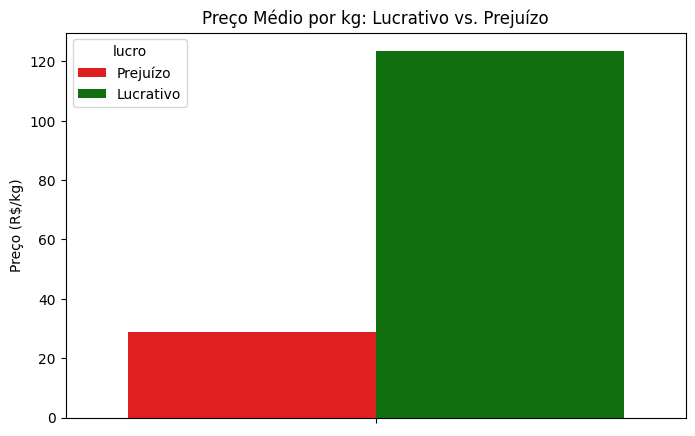

In [ ]:
df['preco_por_kg'] = df['faturamento_anual_por_cli'] / df['peso_equivalente_kg']
preco_medio = df.groupby(df['lucro'] > 0)['preco_por_kg'].mean().round(2)

plt.figure(figsize=(8, 5))
sns.barplot(hue=preco_medio.index.map({True: 'Lucrativo', False: 'Prejuízo'}),
            y=preco_medio.values,
            palette=['red', 'green'])
plt.title('Preço Médio por kg: Lucrativo vs. Prejuízo')
plt.ylabel('Preço (R$/kg)')


Descontos excessivos podem ser a raiz do prejuízo, pois:

Vendas não lucrativas têm preço por kg mais baixo (barra vermelha menor).

Isso corrói a margem, mesmo com alto volume.

TOP 10 CLIENTES PROBLEMÁTICOS:


,nome_cliente,cidade,preco_por_kg,lucro,num_entregas
72,Customer 73,PORTO FELIZ,12.589041,-2650.897568,8
49,Customer 50,SAO PAULO,9.491228,-2297.367883,4
68,Customer 69,SAO PAULO,10.125000,-2187.849325,4
45,Customer 46,SAO PAULO,5.264706,-2116.989105,4
73,Customer 74,GUARULHOS,8.516667,-2116.817908,2
139,Customer 140,SAO PAULO,9.673077,-2114.571248,2
142,Customer 143,SANTOS,9.216667,-2103.487873,2
56,Customer 57,JAU,6.517647,-2053.912410,4
29,Customer 30,FERNANDOPOLIS,8.893939,-2048.144710,10
51,Customer 52,SAO PAULO,9.508772,-2022.172430,4


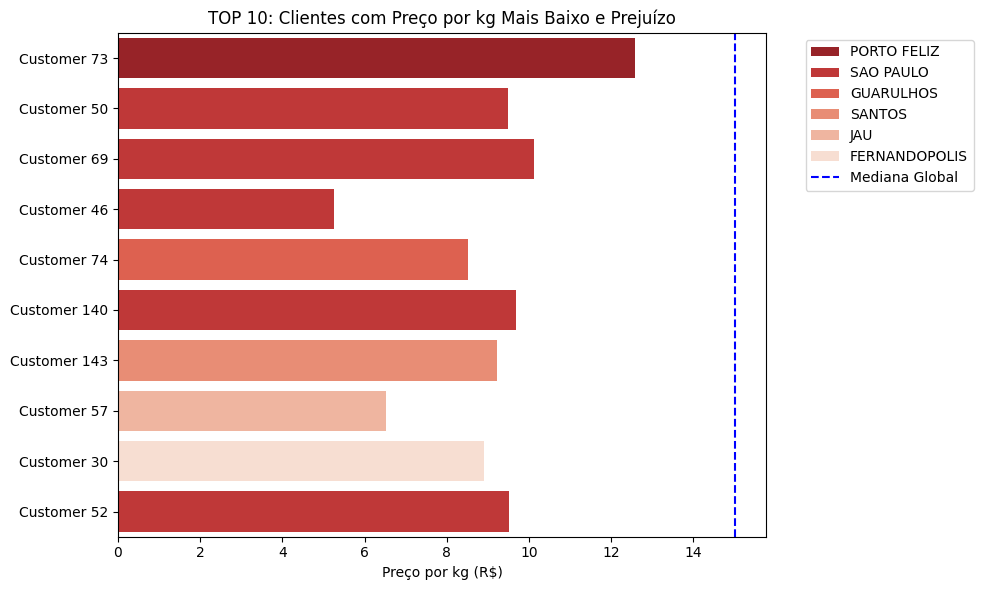

In [ ]:
# Filtrar os 10 piores clientes (preço baixo + prejuízo ou baixo lucro)
top10_problematicos = df[
    (df['preco_por_kg'] < df['preco_por_kg'].median())  # Preço abaixo da mediana
].sort_values(by=['lucro', 'preco_por_kg']).head(10)  # Ordena do maior prejuízo/menor preço

# Tabela resumida
print("TOP 10 CLIENTES PROBLEMÁTICOS:")
display(top10_problematicos[['nome_cliente', 'cidade', 'preco_por_kg', 'lucro', 'num_entregas']])

# Gráfico de alerta
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10_problematicos,
    x='preco_por_kg',
    y='nome_cliente',
    hue='cidade',
    palette='Reds_r',
    dodge=False
)
plt.axvline(x=df['preco_por_kg'].median(), color='blue', linestyle='--', label='Mediana Global')
plt.title('TOP 10: Clientes com Preço por kg Mais Baixo e Prejuízo')
plt.xlabel('Preço por kg (R$)')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

Os clientes com maior prejuízo são os que pagam menos de R$10/kg, muitos deles bem abaixo da mediana global (linha azul).

Cidades como São Paulo, Guarulhos, Jaú e Santos aparecem com frequência

A presença de várias cidades grandes (ex: São Paulo) sugere que a busca por volume pode estar levando à concessão de descontos sem retorno positivo.

Clientes lucrativos pagam em média mais de R$120/kg, enquanto clientes com prejuízo estão na faixa dos R$ 30/kg.

Isso evidencia o impacto direto da precificação na lucratividade.

Vender muito por preço baixo não compensa

#6. Seção de Análise de localidade e custo operacional de fretes

In [ ]:
#Vejo todas as cidades existentes no banco de dados
df["cidade"].unique()

array(['DIADEMA', 'EMBU-GUACU', 'SAO PAULO', 'SAO CAETANO SUL', 'OSASCO',
       'ITAPEC DA SERRA', 'FERRAZ VASCONCELOS', 'CAIEIRAS', 'RIO CLARO',
       'LOUVEIRA', 'POMPEIA', 'BARUERI', 'FRANCA', 'MAUA', 'AURIFLAMA',
       'S BERNARDO CAMPO', 'AMERICANA', 'FERNANDOPOLIS', 'NOVA ODESSA',
       'SANTOS', 'BIRIGUI', 'SAO ROQUE', 'COTIA', 'JAU', 'GUARULHOS',
       'SOROCABA', 'CAMPINAS', 'CAMPO LIMPO PTA', 'SANTO ANDRE',
       'JOSE BONIFACIO', 'MOCOCA', 'JACAREI', 'MORUNGABA', 'BASTOS',
       'PORTO FELIZ', 'POA', 'PIRACAIA', 'INDAIATUBA', 'CABREUVA',
       'ARARAQUARA', 'VOTUPORANGA', 'LEME', 'S J RIO PRETO',
       'SAO VICENTE', 'ITATIBA', 'MOGI-MIRIM', 'SAO CARLOS',
       'STA BARB DOESTE', 'ARTUR NOGUEIRA', 'IBITINGA', 'SUMARE'],
      dtype=object)

In [ ]:
#Quantas cidades existem, sem repetição(unique), qual a cidade que mais aparece e a frequência com que ela aparece
df["cidade"].describe()

,cidade
count,145
unique,51
top,SAO PAULO
freq,48


In [ ]:
#Quantas vezes cada cidade se repete no banco de dados
df["cidade"].value_counts()

,count
cidade,
SAO PAULO,48
AMERICANA,10
DIADEMA,6
FRANCA,6
GUARULHOS,5
BIRIGUI,4
OSASCO,3
CAMPINAS,3
JAU,3


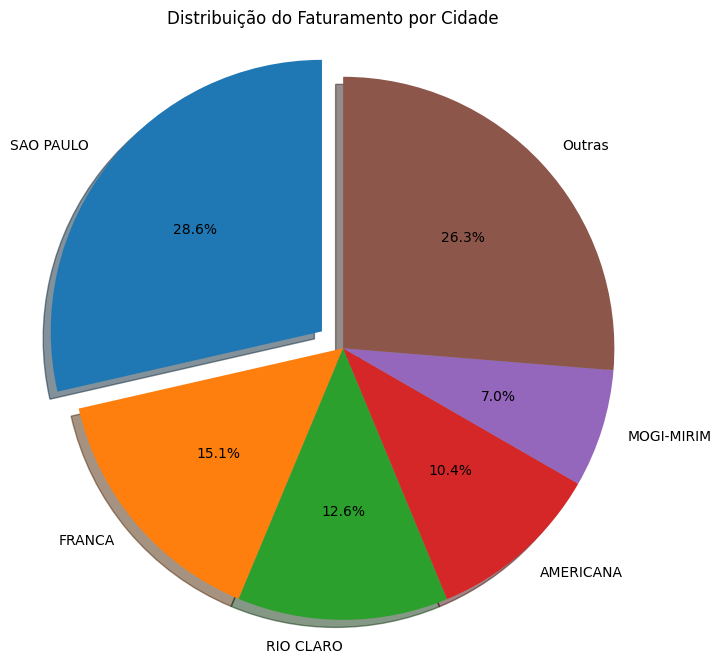

In [ ]:
# Agrupar por cidade e somar o faturamento
df_agrupado = df.groupby('cidade')['faturamento_anual_por_cli'].sum().sort_values(ascending=False)

# Separar as top 5 cidades e agrupar o restante como "Outras"
top5 = df_agrupado.head(5)
outras = pd.Series({'Outras': df_agrupado[5:].sum()})

dados_grafico = pd.concat([top5, outras])

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(dados_grafico,
       labels=dados_grafico.index,
       autopct='%1.1f%%',
       startangle=90,
       shadow=True,
       explode=[0.1 if i == 0 else 0 for i in range(len(dados_grafico))])

ax.axis('equal')
plt.title('Distribuição do Faturamento por Cidade')
plt.show()

/tmp/ipython-input-2637158966.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=entregas_por_cidade,


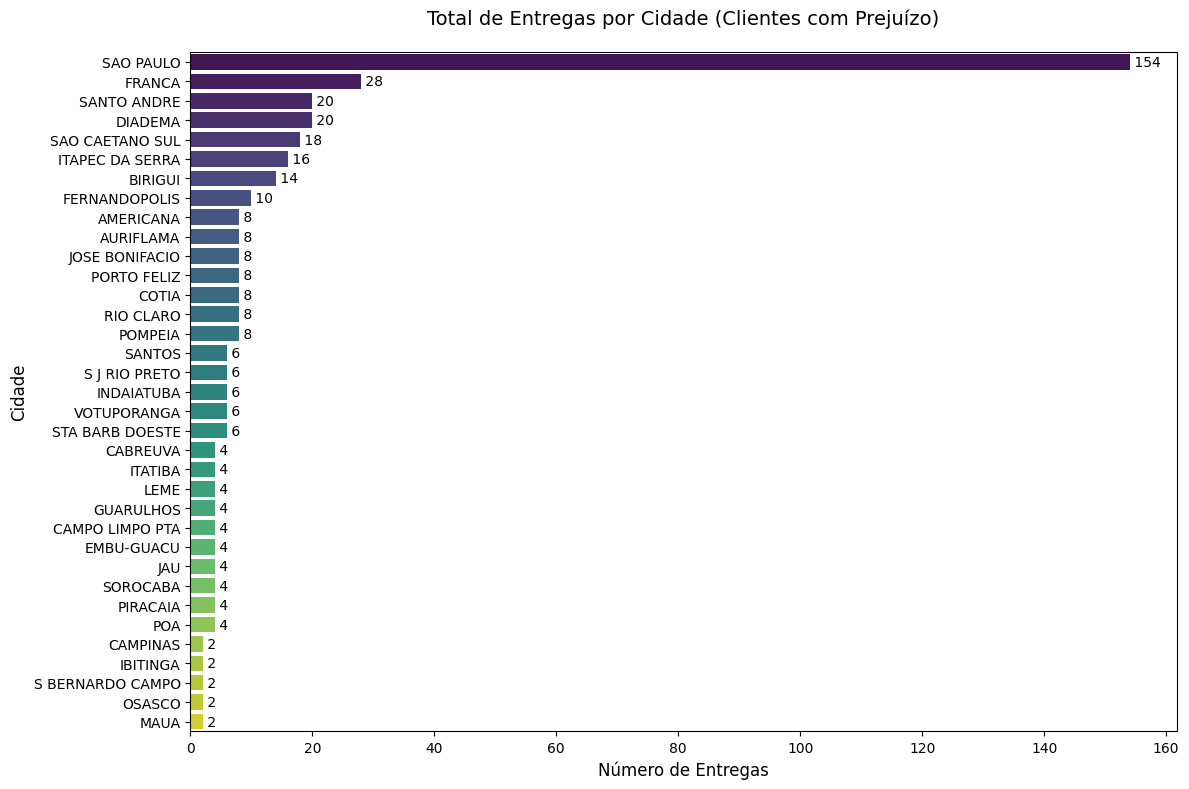

In [ ]:
# Filtrar clientes com prejuízo
cli_negativados = df[(df['faturamento_anual_por_cli'] < custos_totais_cli) & (df.lucro < 0)]

entregas_por_cidade = cli_negativados.groupby('cidade')['num_entregas'].sum().sort_values(ascending=False).reset_index()

# Criar o gráfico
plt.figure(figsize=(12, 8))
sns.barplot(data=entregas_por_cidade,
            x='num_entregas',
            y='cidade',
            palette="viridis",  # Escala de cores sequencial (quanto mais escuro, mais entregas)
            orient='h')

plt.title("Total de Entregas por Cidade (Clientes com Prejuízo)", fontsize=14, pad=20)
plt.xlabel("Número de Entregas", fontsize=12)
plt.ylabel("Cidade", fontsize=12)

for index, value in enumerate(entregas_por_cidade['num_entregas']):
    plt.text(value, index, f' {value}', va='center')

plt.tight_layout()
plt.show()

/tmp/ipython-input-1912733792.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-1912733792.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


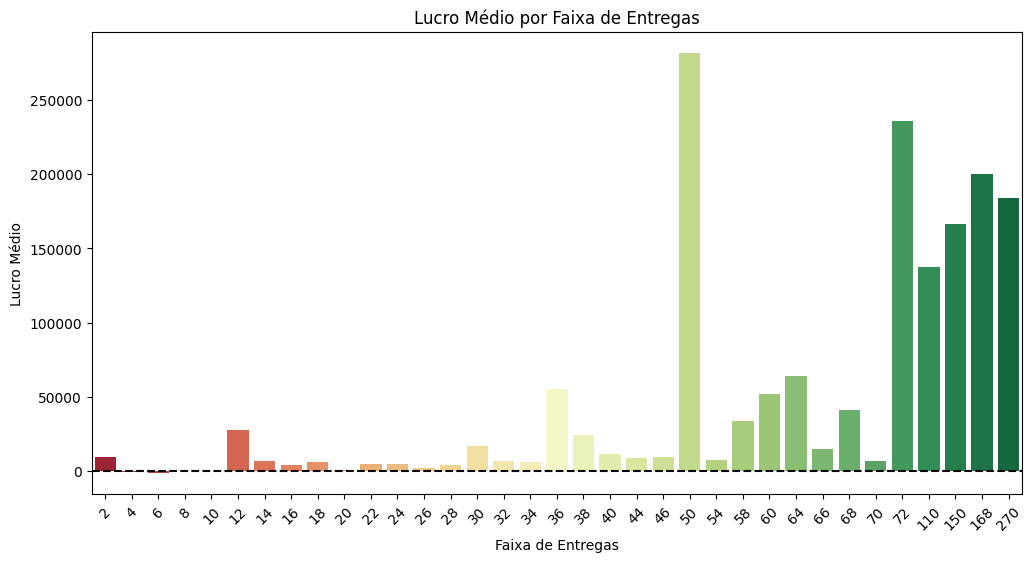

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df,
    x='num_entregas',
    y='lucro',
    ci=None,
    palette="RdYlGn"
)
plt.axhline(0, color='black', linestyle='--')
plt.title('Lucro Médio por Faixa de Entregas')
plt.xlabel('Faixa de Entregas')
plt.ylabel('Lucro Médio')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-870207799.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cidades_soma.values, y=top_cidades_soma.index, palette="Blues_d")


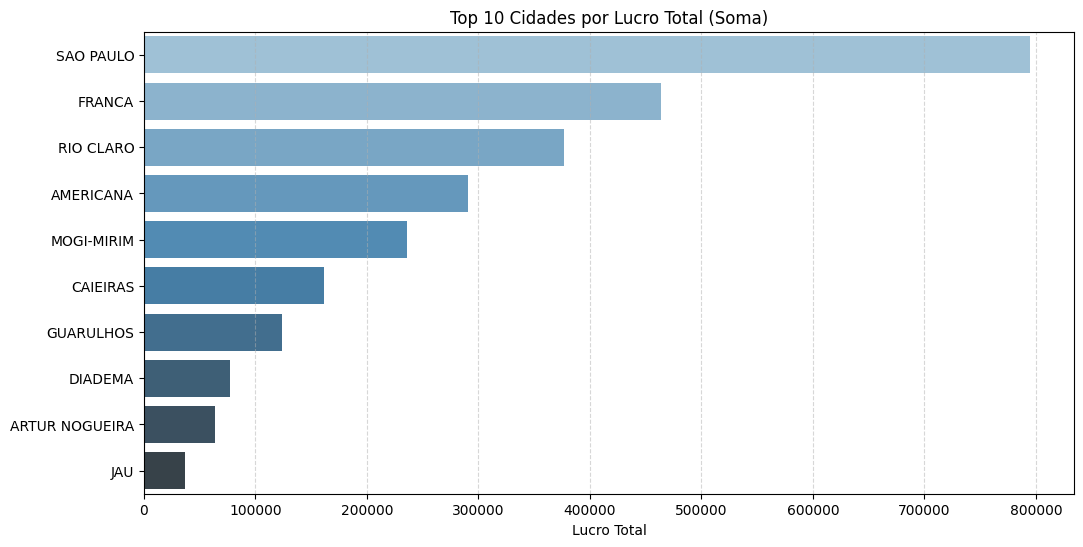

In [ ]:
top_cidades_soma = df.groupby('cidade')['lucro'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cidades_soma.values, y=top_cidades_soma.index, palette="Blues_d")
plt.title("Top 10 Cidades por Lucro Total (Soma)")
plt.xlabel("Lucro Total")
plt.ylabel("")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

In [ ]:
df["cidade"].value_counts()

,count
cidade,
SAO PAULO,48
AMERICANA,10
DIADEMA,6
FRANCA,6
GUARULHOS,5
BIRIGUI,4
OSASCO,3
CAMPINAS,3
JAU,3


Este gráfico mostra o lucro total obtido por cidade (soma dos lucros de todos os clientes da cidade). Para identificar as cidades que mais contribuem para o lucro total da empresa.

Podemos inferir que a cidade de São Paulo tem disparado o maior lucro total, seguida por Franca e Rio Claro, mostrando que essas cidades têm muitos clientes.

Jaú, Artur Nogueira, Diadema e Guarulhos têm os menores lucros totais — são cidades que tem poucos clientes

Sendo assim, é importante ter decisões voltadas para essas cidades mais lucrativas como investimento em infraestrutura, expansão ou alocação de recursos

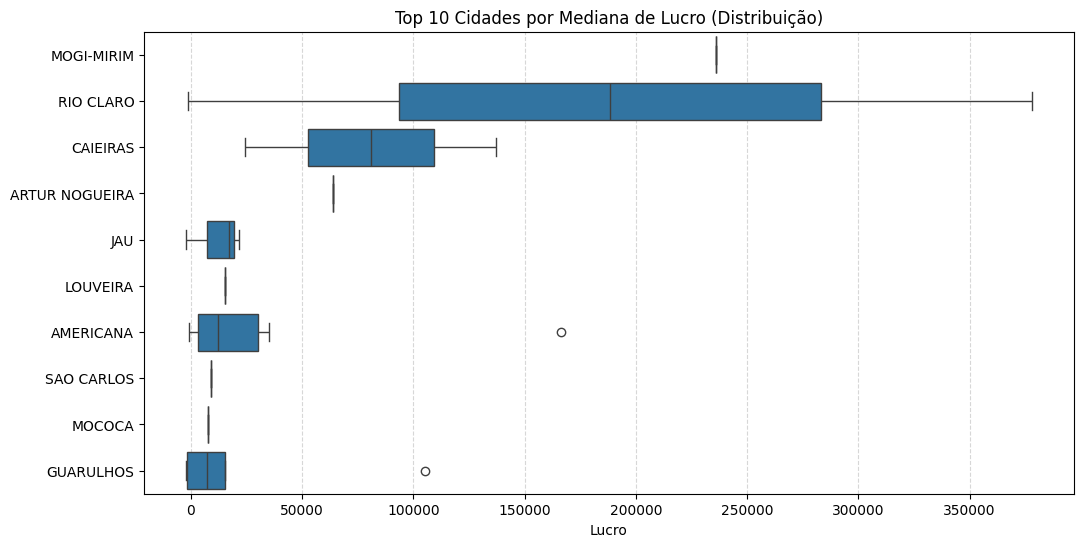

In [ ]:
#Para entender o lucro médio por cliente.
#Identificar cidades com clientes consistentemente lucrativos.
#Se a mediana é alta, mas a distribuição (boxplot) é ampla, há clientes com lucros muito variados.
#Cidades com boxplot "compacto" têm desempenho mais consistente.

top_cidades_mediana = df.groupby('cidade')['lucro'].median().nlargest(10)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['cidade'].isin(top_cidades_mediana.index)], x='lucro', y='cidade', order=top_cidades_mediana.index)
plt.title("Top 10 Cidades por Mediana de Lucro (Distribuição)")
plt.xlabel("Lucro")
plt.ylabel("")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

Este boxplot mostra a distribuição do lucro por cliente em cada cidade, destacando valores centrais e dispersão.

Mogi-Mirim e Rio Claro têm as maiores medianas, o que indica que a maioria dos clientes nessas cidades tem lucros individuais mais altos.

São Paulo nem aparece o que sugere que o alto lucro total vem de volume de clientes, e não de clientes com lucro elevado individualmente.

Boxplot "curto" (comprimido):Lucros concentrados em faixa estável (pouca dispersão)

Boxplot "esticado" (longo): Mostra clientes com lucros consistentemente altos (caixa superior alongada)

/tmp/ipython-input-2561246364.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cidades_media.values, y=top_cidades_media.index, palette="Greens_d")


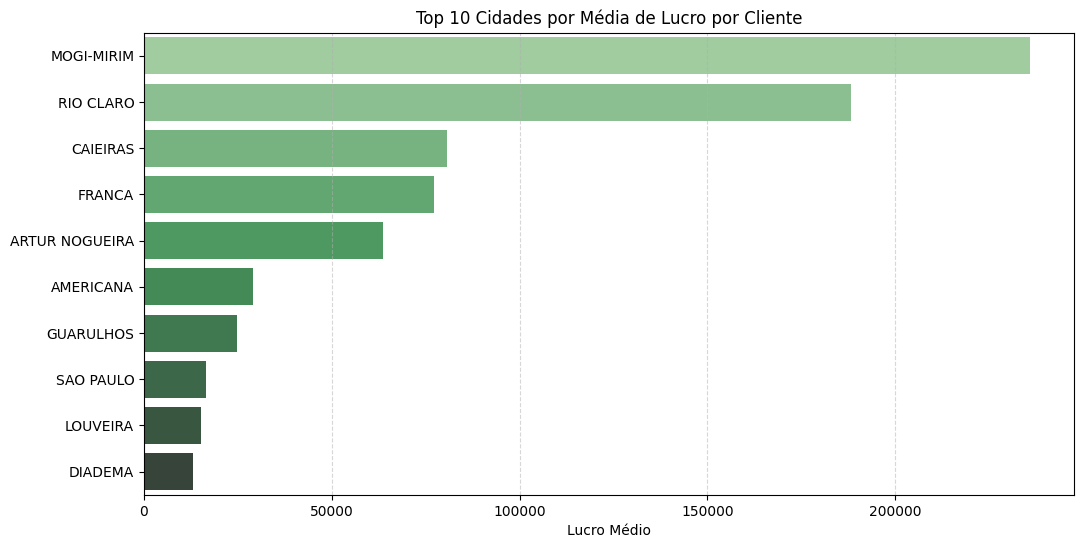

In [ ]:
top_cidades_media = df.groupby('cidade')['lucro'].mean().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cidades_media.values, y=top_cidades_media.index, palette="Greens_d")
plt.title("Top 10 Cidades por Média de Lucro por Cliente")
plt.xlabel("Lucro Médio")
plt.ylabel("")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

#Para comparar o lucro médio gerado por cliente em cada cidade.
#Se a média é muito maior que a mediana, há clientes excepcionalmente lucrativos puxando a média.

Este gráfico mostra a média de lucro por cliente em cada cidade.

Mogi-Mirim é que tem maior lucro médio por cliente, seguida por Rio Claro e Caieiras que apesar de terem menos clientes cada um gera bastante lucro.

Então é interessante investir recursos voltados para essas cidades.

São Paulo tem o maior lucro total, mas está em uma posição muito mais baixa aqui deixando claro que o lucro é alto por ter muitos clientes.(como visto nos outros gráficos)

Diadema, Louveira e São Paulo estão entre os piores em média por cliente, a carteira de clientes dessa cidade deve ser revista.

/tmp/ipython-input-728137214.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cidades_soma.values, y=top_cidades_soma.index, palette="Blues_d")
/tmp/ipython-input-728137214.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cidades_media.values, y=top_cidades_media.index, palette="Greens_d")


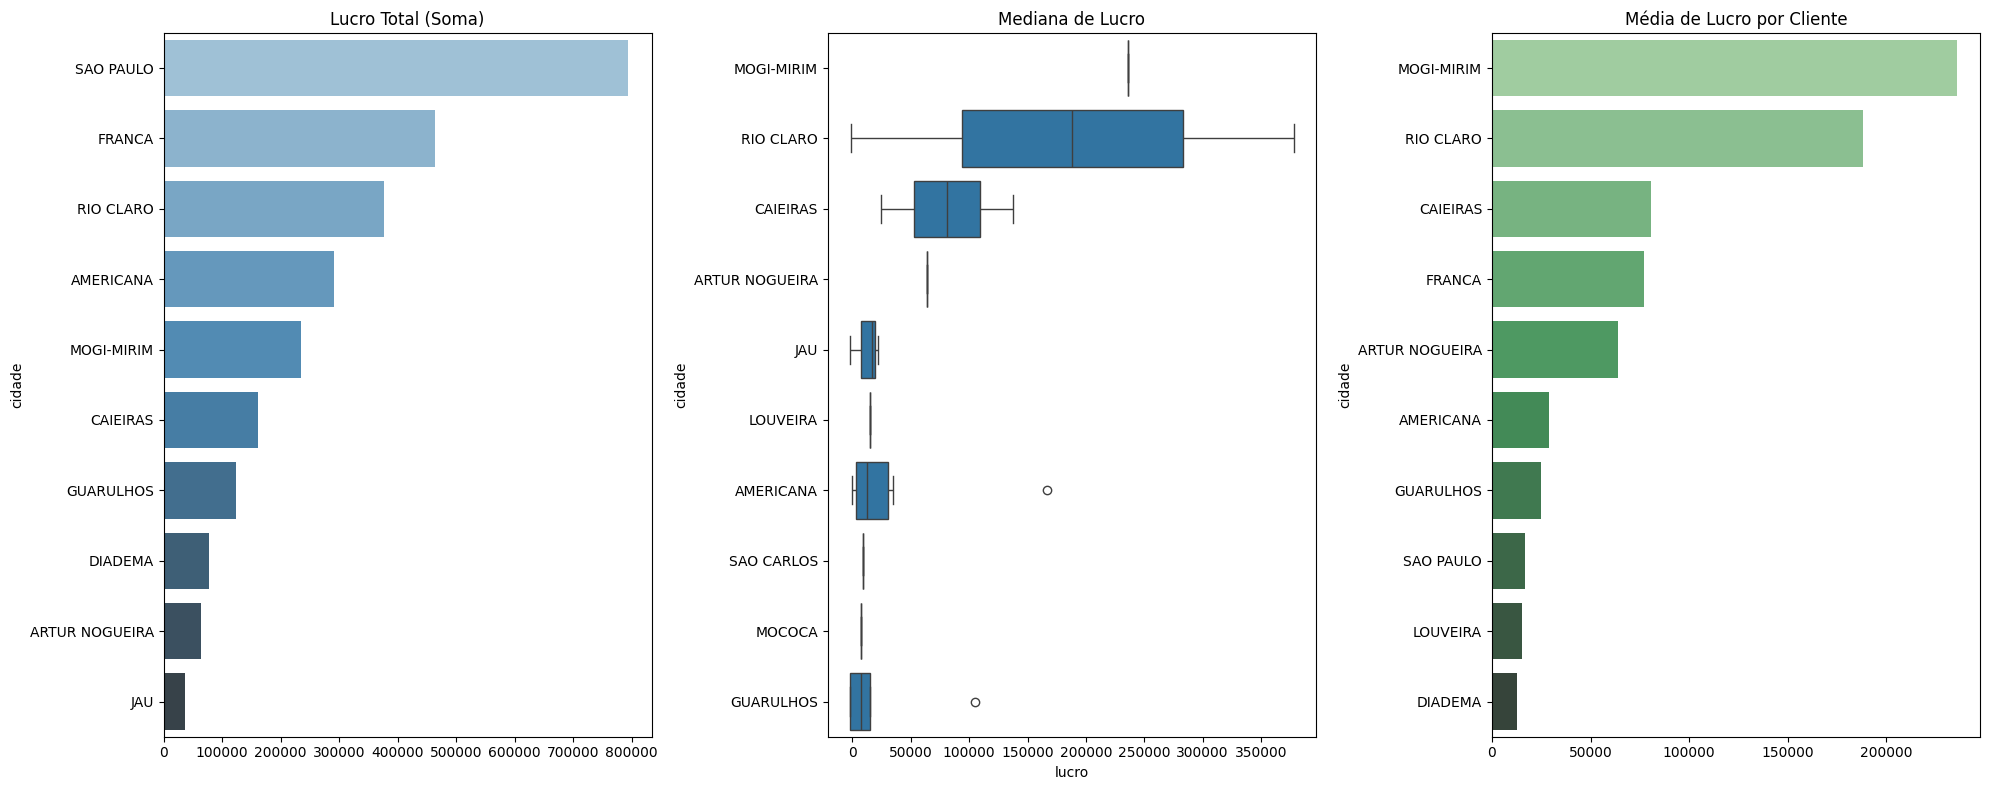

In [ ]:
plt.figure(figsize=(20, 8))

# Gráfico 1: Soma Total
plt.subplot(1, 3, 1)
sns.barplot(x=top_cidades_soma.values, y=top_cidades_soma.index, palette="Blues_d")
plt.title("Lucro Total (Soma)")

# Gráfico 2: Mediana
plt.subplot(1, 3, 2)
sns.boxplot(data=df[df['cidade'].isin(top_cidades_mediana.index)], x='lucro', y='cidade', order=top_cidades_mediana.index)
plt.title("Mediana de Lucro")

# Gráfico 3: Média
plt.subplot(1, 3, 3)
sns.barplot(x=top_cidades_media.values, y=top_cidades_media.index, palette="Greens_d")
plt.title("Média de Lucro por Cliente")

plt.tight_layout()
plt.show()

Em suma, observando os 3 gráficos é possível inferir que:

São Paulo tem o maior lucro total, mas lucro por cliente e mediana baixos, ou seja, volume alto, valor por cliente baixo.

Mogi-Mirim tem alta mediana e média, ou seja, são poucos clientes mas esses são muito lucrativos.

Rio Claro é equilibrada em todos os gráficos, sendo uma cidade promissora e estável.

Caieiras tem uma boa média de lucro por cliente e mediana razoável , ou seja, clientes bons apesar de serem poucos.

Guarulhos e Americana tem baixa mediana, são muitos clientes de baixo lucro e  poucos clientes muito lucrativos.

#Conclusão

Reavaliar política de preços: especialmente em cidades como SP e Guarulhos.

Segmentar clientes deficitários e renegociar ou encerrar contratos abaixo do custo.

Aumentar o foco em clientes de cidades com lucro médio alto (ex: Mogi-Mirim).

Combinar volume com margem mínima por kg: manter um preço piso.

Além disso, relacionando com o gráfico de preço por kg temos que:

São Paulo apesar de ser a cidade que traz mais lucro(visto isso que é por quantidade) é dos focos de clientes com preço baixo.

A baixa mediana de lucro e média por cliente em SP nos gráficos anteriores bate com esse comportamento: muitos clientes com lucro baixo ou negativo.

Cidades com alto lucro médio e mediana, como Mogi-Mirim e Rio Claro, não aparecem entre os clientes deficitários então isso sugere melhor controle e estabilidade nessas cidades.